# PYCON 16: TEXT ANALYSIS

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Model Building in Scikit-Learn

In [50]:
from  sklearn.datasets import load_iris
iris = load_iris()

In [51]:
# Features
X = iris.data

# Target or the response
y = iris.target

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
# Showing the first 5 rows of X 

pd.DataFrame(X,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
# Finding out the target vector

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the model
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
# Predict the response for this observation

knn.predict([[3,5,4,2]])

array([1])

### 2. Representing Text as Numerical Data

In [59]:
# Example text for a model training (SMS messages)

simple_train = ['call you tonight','call me a cab','please call me...PLEASE']

__We use__ ___CountVectorizer___ __to convert text into a matrix of token counts__

In [60]:
# Import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [61]:
# Learn the vocabulary of the training data

vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [62]:
# Examine the fitted vocabulary

vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [63]:
# Transform training data into a document-term matrix

simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [64]:
# Convert sparse matrix to a dense matrix

simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [65]:
pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [66]:
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [67]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [68]:
# Example text for model testing

simple_test =["please don't call me"]

In order to ___make a prediction___, the new observation must have the same 

features as the training observations,both in number and meaning

In [69]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [70]:
pd.DataFrame(simple_test_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


The unknown words are gone!!!

_Summary:_

- vect.fit(train) learns the vocabulary of the training data
- vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
- vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

### 3. Reading a text-based dataset into pandas

In [71]:
path = './pycon-2016-tutorial-master/data/sms.tsv'
sms = pd.read_table(path,header=None,names=['label','message'])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
sms.shape

(5572, 2)

In [73]:
sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [75]:
# Convert label to a numerical variable

sms['label_num'] = sms['label'].map({'ham':0,'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [76]:
# Defining X an y for use with a model

X = sms['message']
y = sms['label_num']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [78]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4179,)
(4179,)
(1393,)
(1393,)


### 4. Vectorizing our dataset

In [82]:
# Importing and Instantiate CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [84]:
# Fitting the model

vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [94]:
# Transform training data into a document-term matrix

X_train_dtm = vect.transform(X_train)

In [95]:
# EQUICALENTLY: Combine fit and transform!

X_train_dtm = vect.fit_transform(X_train)

In [98]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [96]:
# Convert sparse matrix to a dense matrix

X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
# Length should have the same as X_train.shape == 4179...so perfect!

len(X_train_dtm.toarray())

4179

In [99]:
# Don't use fit_transform!!!

X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

### 5. Building and Evaluating a Model

Using Multinomial Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [101]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
# Make class predictions for X_test_dtm

y_pred = nb.predict(X_test_dtm) 

In [104]:
# Calculate Accuracy of class predictions

from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.9885139985642498

In [105]:
# Null Accuracy

max(y_test.mean(), 1 - y_test.mean()) 

0.8671931083991385

In [107]:
# Confusion Matrix

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred) 

Confusion matrix, without normalization
[[1203    5]
 [  11  174]]


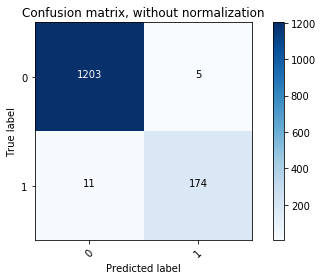

In [108]:
# From Scikit-Learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['0','1'],
                      title='Confusion matrix, without normalization')

plt.show()

Basic terminology

    True Positives (TP): we correctly predicted that they are SPAM
    True Negatives (TN): we correctly predicted that they are not SPAM becuase are HAM
    False Positives (FP): we incorrectly predicted that they are SPAM (a "Type I error")
    False Negatives (FN): we incorrectly predicted that they are not SPAM (a "Type II error")


In [110]:
# save confusion matrix and slice into four pieces

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [119]:
# Classification Accuracy

(TP + TN) / (TP + TN + FP + FN)

0.9885139985642498

In [115]:
# Classification Error

(FP + FN) / (TP + TN + FP + FN)

0.01148600143575018

In [114]:
# Sensitivity: True Positive Rate or Recall

TP / (TP + FN)

0.9405405405405406

In [117]:
# Specificity: True Negative Rate

TN / (TN + FP)

0.9958609271523179

In [112]:
# False Positive Rate

FP / (TN + FP)

0.0041390728476821195

In [118]:
# Precision: Precision Predicting Positive Instances

TP / (TP + FP)

0.9720670391061452

In [125]:
# False Positives

X_test[(y_pred == 1) & (y_test == 0)]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [123]:
# False Negatives

X_test[(y_pred == 0) & (y_test == 1)]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [126]:
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [130]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]

In [131]:
# AUC is useful even when there is high class imbalance (unlike classification accuracy).
from sklearn import metrics 
metrics.roc_auc_score(y_test, y_pred_prob)

0.9866431000536962

### 6. Comparing Models

In [133]:
# 1:48:33